Import files

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving churn_prediction.csv to churn_prediction (1).csv


Import library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read .xlsx and .csv files into Dataframe

In [ ]:
df  = pd.read_excel('data_tugas_1.xlsx')

In [ ]:
dfothersource = pd.read_csv('churn_prediction.csv')

In [ ]:
extracted_col = dfothersource['days_since_last_transaction']

In [ ]:
df.join(extracted_col,lsuffix='left',rsuffix='right')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transactionleft,...,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn,days_since_last_transactionright
0,1,2101,66,Male,0.0,self_employed,1870.0,2,755,224.0,...,145871,144907,2,2,2,2,145871,145871,0,224.0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,779926,1241941,56,56,548627,10056,649678,878761,0,60.0
2,4,2194,31,Male,0.0,salaried,1460.0,2,41,NaN,...,491017,281594,61,61,604673,25923,500628,507014,0,NaN
3,5,2329,90,NaN,NaN,self_employed,10200.0,2,582,147.0,...,208454,100654,47,47,47,214333,229191,166979,1,147.0
4,6,1579,42,Male,20.0,self_employed,14940.0,3,388,58.0,...,164331,187112,33,71461,58862,153806,115715,167716,1,58.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28377,30297,2325,10,Female,0.0,student,10200.0,2,1207,70.0,...,228219,27877,3,3,3,3,107643,107643,0,NaN
28378,30298,1537,34,Female,0.0,self_employed,10460.0,2,223,14.0,...,366883,386555,171,229,9010,101407,373854,369032,0,NaN
28379,30299,2376,47,Male,0.0,salaried,10960.0,2,588,0.0,...,5344481,2192581,466684,388306,16823,718,610785,5756424,1,NaN
28380,30300,1745,50,Male,30.0,self_employed,12190.0,3,274,NaN,...,16832,185742,2,2,2,2,162555,162555,0,NaN


In [ ]:
df.columns

Index(['customer_id', 'vintage', 'age', 'gender', 'dependents', 'occupation',
       'city', 'customer_nw_category', 'branch_code',
       'days_since_last_transaction', 'current_balance',
       'previous_month_end_balance', 'average_monthly_balance_prevQ',
       'average_monthly_balance_prevQ2', 'current_month_credit',
       'previous_month_credit', 'current_month_debit', 'previous_month_debit',
       'current_month_balance', 'previous_month_balance', 'churn'],
      dtype='object')

In [ ]:
df.head()

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,2101,66,Male,0.0,self_employed,1870.0,2,755,224.0,...,145871,145871,144907,2,2,2,2,145871,145871,0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,870466,779926,1241941,56,56,548627,10056,649678,878761,0
2,4,2194,31,Male,0.0,salaried,1460.0,2,41,NaN,...,581529,491017,281594,61,61,604673,25923,500628,507014,0
3,5,2329,90,NaN,NaN,self_employed,10200.0,2,582,147.0,...,229191,208454,100654,47,47,47,214333,229191,166979,1
4,6,1579,42,Male,20.0,self_employed,14940.0,3,388,58.0,...,140172,164331,187112,33,71461,58862,153806,115715,167716,1


In [ ]:
# Buat DataFrame untuk customer yang Churn = 1
df_churn = df[df['churn']==1]
df_churn

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
3,5,2329,90,NaN,NaN,self_employed,10200.0,2,582,147.0,...,229191,208454,100654,47,47,47,214333,229191,166979,1
4,6,1579,42,Male,20.0,self_employed,14940.0,3,388,58.0,...,140172,164331,187112,33,71461,58862,153806,115715,167716,1
12,14,2211,73,Male,0.0,retired,440.0,3,409,47.0,...,572866,179439,13725,33,50033,50989,50853,254122,26126,1
14,16,1917,48,Female,0.0,self_employed,6650.0,2,569,52.0,...,548914,653299,772034,66,66173,66,281153,543704,663394,1
16,19,2293,49,Male,0.0,self_employed,11250.0,3,1023,0.0,...,318327,302127,171093,19071,11364,246166,125741,195095,31270,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28368,30288,2266,78,Female,NaN,self_employed,3620.0,2,464,62.0,...,32371,156795,258569,54,54,54,571483,32371,50805,1
28372,30292,2183,49,Male,10.0,self_employed,13200.0,3,1347,25.0,...,1053524,214522,582711,28633,1068633,1060946,60946,204676,38434,1
28374,30294,2417,55,Male,0.0,salaried,10760.0,3,463,306.0,...,771388,771388,767006,33,33,33,33,771388,771388,1
28379,30299,2376,47,Male,0.0,salaried,10960.0,2,588,0.0,...,6101755,5344481,2192581,466684,388306,16823,718,610785,5756424,1


In [ ]:
# Buat DataFrame untuk customer yang Churn = 0
df_nonchurn = df[df['churn']==0]
df_nonchurn

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
0,1,2101,66,Male,0.0,self_employed,1870.0,2,755,224.0,...,145871,145871,144907,2,2,2,2,145871,145871,0
1,2,2348,35,Male,0.0,self_employed,NaN,2,3214,60.0,...,870466,779926,1241941,56,56,548627,10056,649678,878761,0
2,4,2194,31,Male,0.0,salaried,1460.0,2,41,NaN,...,581529,491017,281594,61,61,604673,25923,500628,507014,0
5,7,1923,42,Female,0.0,self_employed,10960.0,2,1666,60.0,...,1605934,1521129,1379882,36,36,8575,28607,1571944,1534975,0
6,8,2048,72,Male,0.0,retired,10200.0,1,1,98.0,...,771419,785974,1123237,64,64,129964,43926,707606,775598,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
28375,30295,2398,42,Male,0.0,self_employed,1460.0,2,286,57.0,...,677741,808248,351503,51,901,11032,118304,795603,743136,0
28376,30296,2300,85,Male,0.0,retired,15890.0,2,389,NaN,...,17415,17415,173046,4,4,4,4,17415,17415,0
28377,30297,2325,10,Female,0.0,student,10200.0,2,1207,70.0,...,107643,228219,27877,3,3,3,3,107643,107643,0
28378,30298,1537,34,Female,0.0,self_employed,10460.0,2,223,14.0,...,406921,366883,386555,171,229,9010,101407,373854,369032,0


Descriptive Statistics

In [ ]:
df.describe(include="all")

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,28382.000000,28382.000000,28382.000000,27857,25919.000000,28302,27579.000000,28382.000000,28382.000000,25159.000000,...,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,2.838200e+04,28382.000000
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,16548,NaN,17476,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15143.508667,2091.144105,48.208336,NaN,3.472356,NaN,7961.095761,2.225530,925.975019,69.997814,...,6.789604e+05,6.845480e+05,6.411363e+05,3.109657e+05,2.969449e+05,3.284854e+05,2.950264e+05,6.758841e+05,6.638841e+05,0.185329
std,8746.454456,272.676775,17.807163,NaN,9.976607,NaN,4328.721025,0.660443,937.799129,86.341098,...,4.103473e+06,4.073166e+06,3.318959e+06,7.682399e+06,2.928506e+06,5.126751e+06,2.233222e+06,4.081232e+06,2.393405e+06,0.388571
min,1.000000,73.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+05,1.429000e+04,-1.069193e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.374180e+05,-5.171920e+05,0.000000
25%,7557.250000,1958.000000,36.000000,NaN,0.000000,NaN,4090.000000,2.000000,176.000000,11.000000,...,1.593872e+05,1.907922e+05,1.508022e+05,2.400000e+01,2.400000e+01,3.600000e+01,3.600000e+01,1.675268e+05,1.761310e+05,0.000000
50%,15150.500000,2154.000000,46.000000,NaN,0.000000,NaN,8340.000000,2.000000,572.000000,30.000000,...,3.003815e+05,3.192350e+05,2.991900e+05,5.900000e+01,6.100000e+01,5.288500e+03,6.262500e+03,3.075115e+05,3.096030e+05,0.000000
75%,22706.750000,2292.000000,60.000000,NaN,0.000000,NaN,10960.000000,3.000000,1440.000000,95.000000,...,6.104620e+05,6.158952e+05,5.993240e+05,5.157000e+04,6.207225e+04,1.051150e+05,1.051962e+05,6.146945e+05,6.128102e+05,0.000000


In [ ]:
df_churn.describe(include='all')

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,5260.000000,5260.000000,5260.000000,5154,4733.000000,5247,5097.000000,5260.000000,5260.000000,4961.000000,...,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5.260000e+03,5260.0
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,3169,NaN,3467,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15093.581369,2088.417681,47.461217,NaN,4.179168,NaN,7946.684324,2.234601,995.714068,60.271518,...,7.539920e+05,7.814267e+05,8.246120e+05,6.320259e+05,5.357587e+05,8.029792e+05,6.475774e+05,6.218926e+05,8.090026e+05,1.0
std,8616.082679,272.610911,17.175974,NaN,11.394116,NaN,4372.554458,0.670530,973.840943,74.813552,...,3.354926e+06,3.295869e+06,6.842650e+06,1.709764e+07,3.196736e+06,1.105820e+07,3.087513e+06,2.958652e+06,3.442749e+06,0.0
min,5.000000,469.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.145380e+05,1.429900e+04,-1.069193e+06,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-2.227290e+05,-1.696240e+05,1.0
25%,7780.250000,1949.000000,35.000000,NaN,0.000000,NaN,4090.000000,2.000000,192.000000,11.000000,...,8.586900e+04,1.889535e+05,9.428500e+04,2.700000e+01,3.100000e+01,6.900000e+01,6.100000e+01,8.740825e+04,1.674590e+05,1.0
50%,15098.000000,2155.000000,45.000000,NaN,0.000000,NaN,8340.000000,2.000000,639.500000,28.000000,...,2.553440e+05,3.282165e+05,2.742810e+05,6.400000e+01,1.765000e+02,7.425550e+04,5.997000e+04,2.212315e+05,3.229000e+05,1.0
75%,22518.250000,2289.250000,59.000000,NaN,0.000000,NaN,10960.000000,3.000000,1562.000000,77.000000,...,6.223392e+05,6.590645e+05,6.414290e+05,7.216950e+04,1.357488e+05,3.697968e+05,3.571725e+05,5.256635e+05,6.973740e+05,1.0


In [ ]:
df_nonchurn.describe(include="all")

,customer_id,vintage,age,gender,dependents,occupation,city,customer_nw_category,branch_code,days_since_last_transaction,...,previous_month_end_balance,average_monthly_balance_prevQ,average_monthly_balance_prevQ2,current_month_credit,previous_month_credit,current_month_debit,previous_month_debit,current_month_balance,previous_month_balance,churn
count,23122.000000,23122.000000,23122.000000,22703,21186.000000,23055,22482.000000,23122.000000,23122.000000,20198.000000,...,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,2.312200e+04,23122.0
unique,NaN,NaN,NaN,2,NaN,5,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,Male,NaN,self_employed,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,13379,NaN,14009,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,15154.866577,2091.764337,48.378298,NaN,3.314453,NaN,7964.363046,2.223467,910.110155,72.386771,...,6.618916e+05,6.625091e+05,5.993976e+05,2.379281e+05,2.426174e+05,2.205433e+05,2.148249e+05,6.881665e+05,6.308712e+05,0.0
std,8775.986731,272.693844,17.943672,NaN,9.624675,NaN,4318.812804,0.658124,928.695663,88.783052,...,4.255293e+06,4.229850e+06,1.691806e+06,2.434205e+06,2.861274e+06,2.094288e+06,1.979621e+06,4.295801e+06,2.080815e+06,0.0
min,1.000000,73.000000,1.000000,NaN,0.000000,NaN,0.000000,1.000000,1.000000,0.000000,...,-3.149570e+05,1.429000e+04,-5.714080e+05,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,-3.374180e+05,-5.171920e+05,0.0
25%,7505.250000,1960.000000,36.000000,NaN,0.000000,NaN,4090.000000,2.000000,171.000000,11.000000,...,1.689082e+05,1.911722e+05,1.583822e+05,2.400000e+01,2.400000e+01,3.100000e+01,3.300000e+01,1.831845e+05,1.776305e+05,0.0
50%,15158.500000,2154.000000,46.000000,NaN,0.000000,NaN,8340.000000,2.000000,553.000000,31.000000,...,3.081695e+05,3.179495e+05,3.039420e+05,5.900000e+01,5.900000e+01,1.431000e+03,2.306000e+03,3.234455e+05,3.071115e+05,0.0
75%,22755.250000,2293.000000,61.000000,NaN,0.000000,NaN,10960.000000,3.000000,1416.000000,102.000000,...,6.079242e+05,6.075865e+05,5.908985e+05,4.787750e+04,5.217450e+04,6.824825e+04,7.147700e+04,6.329012e+05,5.947048e+05,0.0


In [ ]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
dtype: int64

# Analisis Univariat

## Vintage

In [ ]:
df['vintage'].describe()

count    28382.000000
mean      2091.144105
std        272.676775
min         73.000000
25%       1958.000000
50%       2154.000000
75%       2292.000000
max       2476.000000
Name: vintage, dtype: float64

In [ ]:
df['vintage'].mode()

0    2251
1    2260
dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


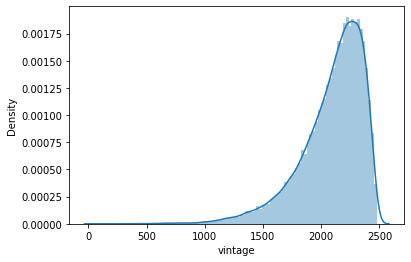

In [ ]:
sns.distplot(df['vintage'], bins=100)

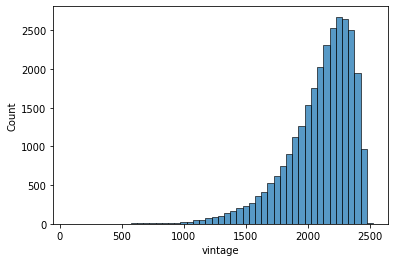

In [ ]:
sns.histplot(x='vintage', data=df, binwidth=50)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


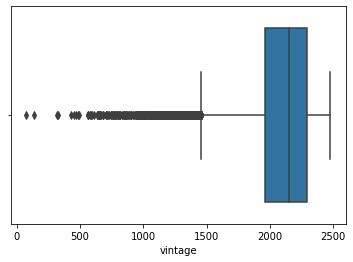

In [ ]:
sns.boxplot(df['vintage'])

## Age

In [ ]:
print(df['age'].describe())
print(df['age'].mode())

count    28382.000000
mean        48.208336
std         17.807163
min          1.000000
25%         36.000000
50%         46.000000
75%         60.000000
max         90.000000
Name: age, dtype: float64
0    90
dtype: int64


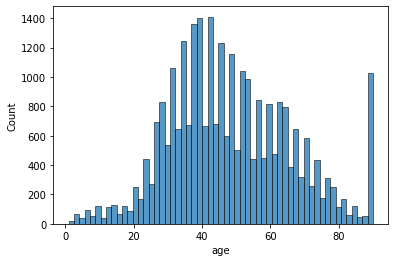

In [ ]:
sns.histplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


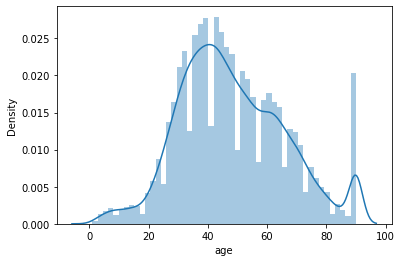

In [ ]:
sns.distplot(df['age'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


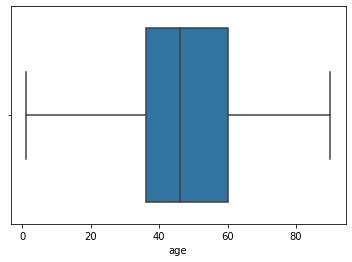

In [ ]:
sns.boxplot(df['age'])

## Gender

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


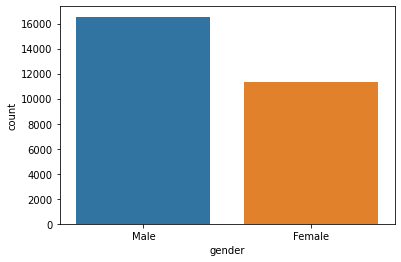

In [ ]:
sns.countplot(df['gender'])

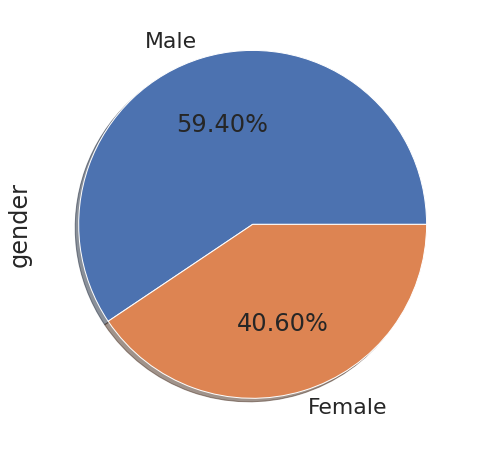

In [ ]:
df['gender'].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, figsize=(10,8))
sns.set(font_scale=0.5)
plt.show()

In [ ]:
print("Male: ", len(df[df['gender']=='Male']))
print("Female: ", len(df[df['gender']=='Female']))

Male:  16548
Female:  11309


## Dependents

In [ ]:
df['dependents'].describe()

count    25919.000000
mean         3.472356
std          9.976607
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        520.000000
Name: dependents, dtype: float64

In [ ]:
df['dependents'].value_counts()

0.0      21435
20.0      2150
10.0      1395
30.0       701
40.0       179
50.0        41
60.0         8
70.0         3
90.0         1
520.0        1
360.0        1
500.0        1
80.0         1
250.0        1
320.0        1
Name: dependents, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


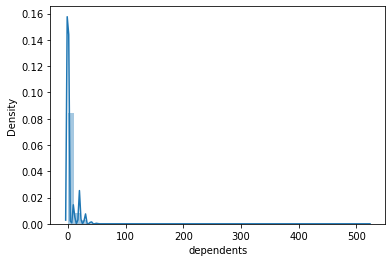

In [ ]:
fig, ax = plt.subplots()
sns.distplot(df['dependents'], ax=ax)  # distplot is deprecate and replaced by histplot
#ax.set_xlim(0,50)
plt.show()

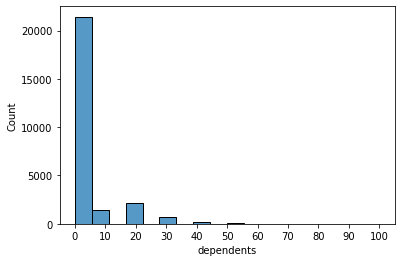

In [ ]:
sns.histplot(df['dependents'], binrange=(0,100))
plt.xticks([0,10,20,30,40,50,60,70,80,90,100])
plt.show()

## Occupation

In [ ]:
df['occupation'].value_counts()

self_employed    17476
salaried          6704
student           2058
retired           2024
company             40
Name: occupation, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


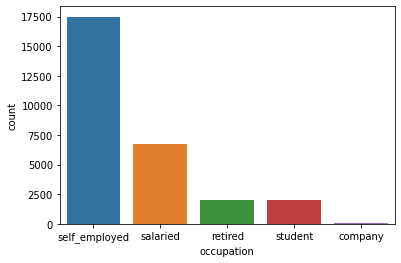

In [ ]:
sns.countplot(df['occupation'])

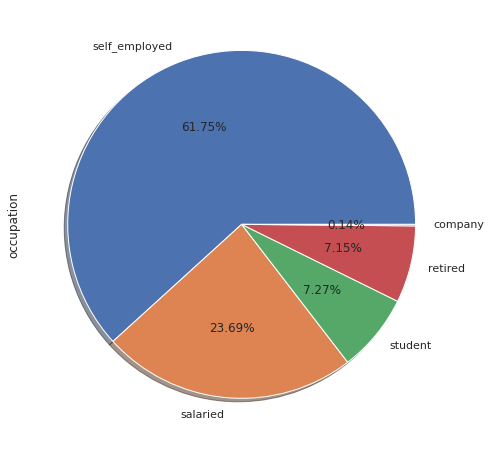

In [ ]:
df['occupation'].value_counts().plot.pie(autopct="%1.2f%%",shadow=True, figsize=(10,8))
sns.set(font_scale=0.5)
plt.show()

## City

In [ ]:
df['city'].value_counts()

10200.0    3479
10960.0    2016
4090.0     1334
1460.0     1291
8340.0     1138
           ... 
7480.0        1
10990.0       1
1080.0        1
6550.0        1
7230.0        1
Name: city, Length: 1604, dtype: int64

In [ ]:
print("kode kota 10200:", len(df[df['city']==10200]) / df['city'].count())
print("kode kota 10960:", len(df[df['city']==10960]) / df['city'].count())
print("kode kota 4090:", len(df[df['city']==4090]) / df['city'].count())
print("kode kota 1460:", len(df[df['city']==1460]) / df['city'].count())
print("kode kota 8340:", len(df[df['city']==8340]) / df['city'].count())

kode kota 10200: 0.12614670582689727
kode kota 10960: 0.0730990971391276
kode kota 4090: 0.048370136698212406
kode kota 1460: 0.046810979368359984
kode kota 8340: 0.041263280031908336


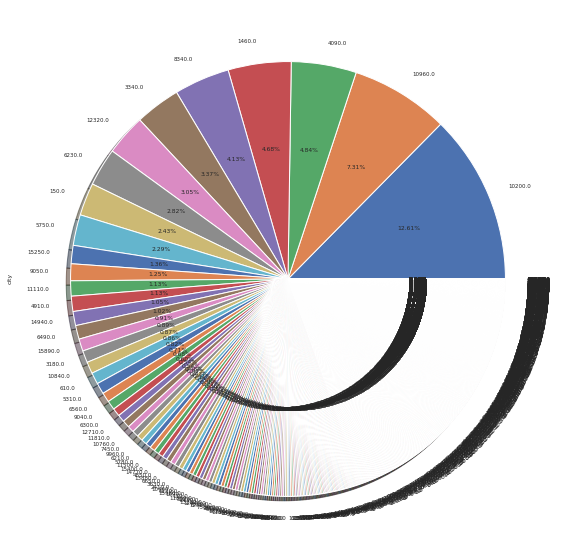

In [ ]:
df['city'].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, figsize=(20,10))
sns.set(font_scale=1)
plt.show()

## Customer Net Worth Category
3: low, 2: medium, 1: high

In [ ]:
df['customer_nw_category'].value_counts()

2    14559
3    10112
1     3711
Name: customer_nw_category, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


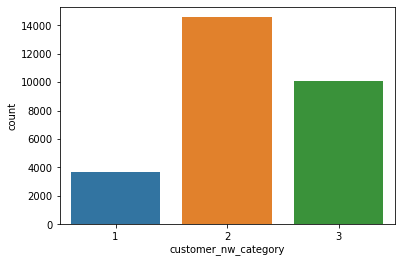

In [ ]:
sns.countplot(df['customer_nw_category'])

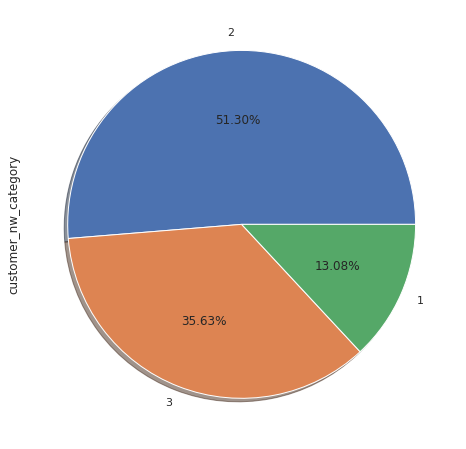

In [ ]:
df['customer_nw_category'].value_counts().plot.pie(autopct="%1.2f%%", shadow=True, figsize=(10,8))
sns.set(font_scale=0.5)

## Days Since Last Transaction

In [ ]:
df['days_since_last_transaction'].describe()

count    25159.000000
mean        69.997814
std         86.341098
min          0.000000
25%         11.000000
50%         30.000000
75%         95.000000
max        365.000000
Name: days_since_last_transaction, dtype: float64

In [ ]:
print("Min:", df['days_since_last_transaction'].min())
print("25%:", df['days_since_last_transaction'].quantile(.25))
print("50%:", df['days_since_last_transaction'].quantile(.5))
print("75%:", df['days_since_last_transaction'].quantile(.75))
print("Max:", df['days_since_last_transaction'].max())
print("Mean:", df['days_since_last_transaction'].mean())
print("Median:", df['days_since_last_transaction'].median())

Min: 0.0
25%: 11.0
50%: 30.0
75%: 95.0
Max: 365.0
Mean: 69.99781390357327
Median: 30.0


In [ ]:
df['days_since_last_transaction'].mode()

0    0.0
dtype: float64

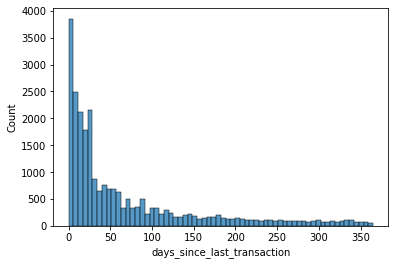

In [ ]:
sns.histplot(df['days_since_last_transaction'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


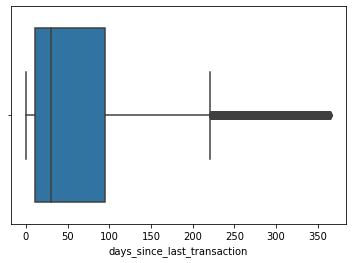

In [ ]:
sns.reset_orig()
sns.boxplot(df['days_since_last_transaction'])

## Branch Code

In [ ]:
df['branch_code'].value_counts()

19      145
6       142
60      128
16      111
8       109
       ... 
3690      1
2569      1
4017      1
4264      1
4104      1
Name: branch_code, Length: 3185, dtype: int64

In [ ]:
print("kode cabang 19:", len(df[df['branch_code']==19]) / df['branch_code'].count())
print("kode cabang 6:", len(df[df['branch_code']==6]) / df['branch_code'].count())
print("kode cabang 60:", len(df[df['branch_code']==60]) / df['branch_code'].count())
print("kode cabang 16:", len(df[df['branch_code']==16]) / df['branch_code'].count())
print("kode cabang 8:", len(df[df['branch_code']==8]) / df['branch_code'].count())

kode cabang 19: 0.005108871820167712
kode cabang 6: 0.00500317102388838
kode cabang 60: 0.004509900641251497
kode cabang 16: 0.0039109294623352825
kode cabang 8: 0.003840462264815728


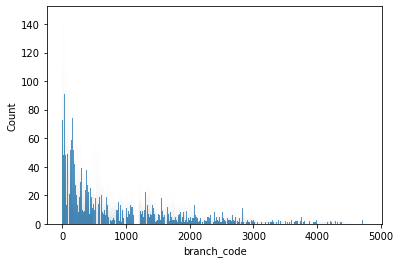

In [ ]:
sns.reset_orig()
sns.histplot(df['branch_code'], discrete=True)

## Current Balance

In [ ]:
print("Min:", df['current_balance'].min())
print("25%:", df['current_balance'].quantile(.25))
print("50%:", df['current_balance'].quantile(.5))
print("75%:", df['current_balance'].quantile(.75))
print("Max:", df['current_balance'].max())
print("Mean:", df['current_balance'].mean())
print("Median:", df['current_balance'].median())

Min: -550396
25%: 146355.0
50%: 289892.0
75%: 607740.25
Max: 590590403
Mean: 664336.6531604538
Median: 289892.0


In [ ]:
df['current_balance'].std()

4077000.433813001

In [ ]:
df['current_balance'].mode()

0    142907
dtype: int64

In [ ]:
print("lowerbound:",df['current_balance'].quantile(.25)-(1.5*df['current_balance'].quantile(.25)))
print("upperbound:",df['current_balance'].quantile(.75)+(1.5*df['current_balance'].quantile(.75)))

lowerbound: -73177.5
upperbound: 1519350.625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


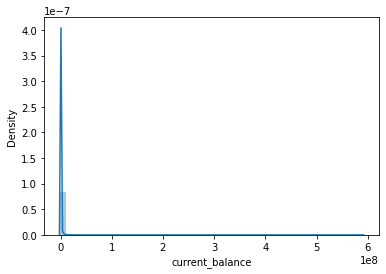

In [ ]:
sns.distplot(df['current_balance'])

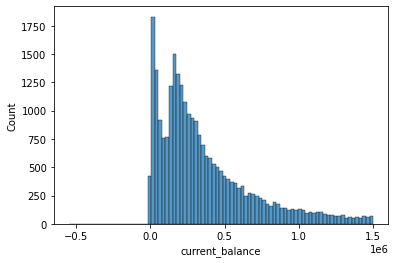

In [ ]:
sns.histplot(df['current_balance'], binrange=(-550000,1500000))

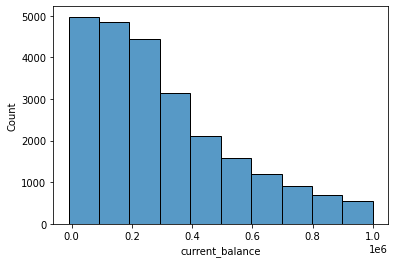

In [ ]:
sns.histplot(df['current_balance'], bins=10, binrange=(-10000,1000000))

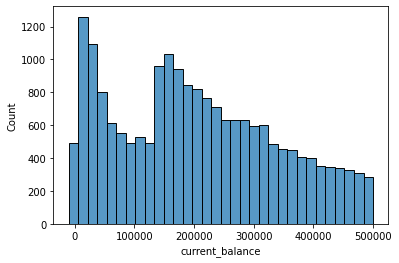

In [ ]:
sns.histplot(df['current_balance'], binrange=(-10000,500000))

## Previous Month End Balance

In [ ]:
print("Min:", df['previous_month_end_balance'].min())
print("25%:", df['previous_month_end_balance'].quantile(.25))
print("50%:", df['previous_month_end_balance'].quantile(.5))
print("75%:", df['previous_month_end_balance'].quantile(.75))
print("Max:", df['previous_month_end_balance'].max())
print("Mean:", df['previous_month_end_balance'].mean())
print("Median:", df['previous_month_end_balance'].median())
print("Mode:", df['previous_month_end_balance'].mode())
print("Standard deviation:", df['previous_month_end_balance'].std())

Min: -314957
25%: 159387.25
50%: 300381.5
75%: 610462.0
Max: 574043863
Mean: 678960.4222042139
Median: 300381.5
Mode: 0    142873
1    142883
dtype: int64
Standard deviation: 4103472.7654632567


In [ ]:
print("lowerbound:",df['previous_month_end_balance'].quantile(.25)-(1.5*df['previous_month_end_balance'].quantile(.25)))
print("upperbound:",df['previous_month_end_balance'].quantile(.75)+(1.5*df['previous_month_end_balance'].quantile(.75)))

lowerbound: -79693.625
upperbound: 1526155.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


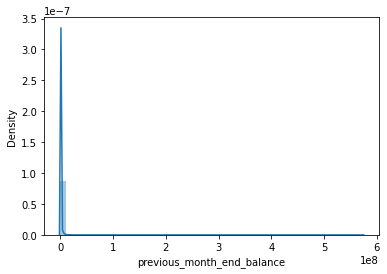

In [ ]:
sns.distplot(df['previous_month_end_balance'])

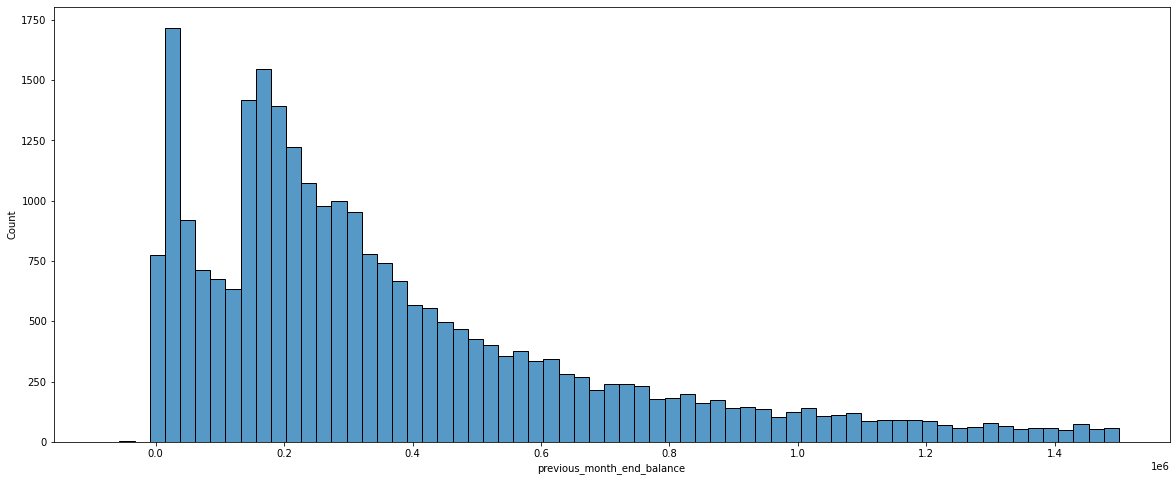

In [ ]:
plt.figure(figsize=(20,8))
sns.histplot(df['previous_month_end_balance'], binrange=(-80000,1500000))

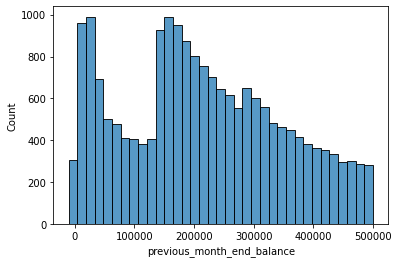

In [ ]:
sns.histplot(df['previous_month_end_balance'], binrange=(-10000,500000))

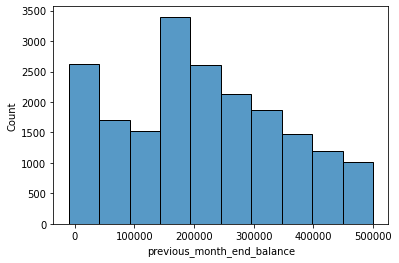

In [ ]:
sns.histplot(df['previous_month_end_balance'], bins=10, binrange=(-10000,500000))

## Average Monthly Balance Previous Quarter

In [ ]:
print("Min:", df['average_monthly_balance_prevQ'].min())
print("25%:", df['average_monthly_balance_prevQ'].quantile(.25))
print("50%:", df['average_monthly_balance_prevQ'].quantile(.5))
print("75%:", df['average_monthly_balance_prevQ'].quantile(.75))
print("Max:", df['average_monthly_balance_prevQ'].max())
print("Mean:", df['average_monthly_balance_prevQ'].mean())
print("Median:", df['average_monthly_balance_prevQ'].median())
print("Mode:", df['average_monthly_balance_prevQ'].mode())
print("Standard deviation:", df['average_monthly_balance_prevQ'].std())

Min: 14290
25%: 190792.25
50%: 319235.0
75%: 615895.25
Max: 570028957
Mean: 684547.9812204918
Median: 319235.0
Mode: 0     145107
1     147193
2     151679
3     154182
4     166386
5     173785
6     175715
7     183771
8     200685
9     259768
10    267103
11    275136
12    296171
13    356244
14    391464
dtype: int64
Standard deviation: 4073166.024360289


In [ ]:
print("lowerbound:",df['average_monthly_balance_prevQ'].quantile(.25)-(1.5*df['average_monthly_balance_prevQ'].quantile(.25)))
print("upperbound:",df['average_monthly_balance_prevQ'].quantile(.75)+(1.5*df['average_monthly_balance_prevQ'].quantile(.75)))

lowerbound: -95396.125
upperbound: 1539738.125


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


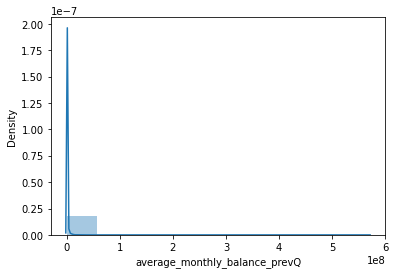

In [ ]:
sns.distplot(df['average_monthly_balance_prevQ'], bins=10)

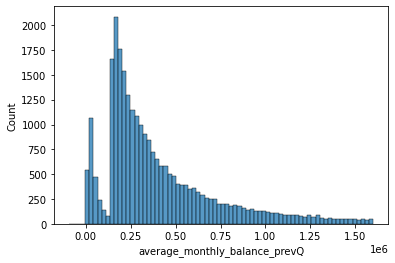

In [ ]:
sns.histplot(df['average_monthly_balance_prevQ'], binrange=(-95000,1600000))

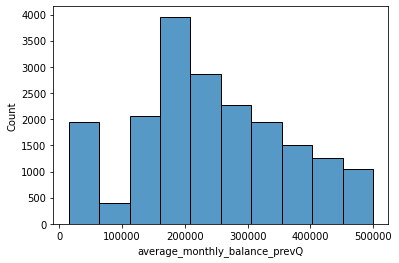

In [ ]:
sns.histplot(df['average_monthly_balance_prevQ'], bins=10, binrange=(15000,500000))

## Average Monthly Balances in Previous to Previous Quarter

In [ ]:
print("Min:", df['average_monthly_balance_prevQ2'].min())
print("25%:", df['average_monthly_balance_prevQ2'].quantile(.25))
print("50%:", df['average_monthly_balance_prevQ2'].quantile(.5))
print("75%:", df['average_monthly_balance_prevQ2'].quantile(.75))
print("Max:", df['average_monthly_balance_prevQ2'].max())
print("Mean:", df['average_monthly_balance_prevQ2'].mean())
print("Median:", df['average_monthly_balance_prevQ2'].median())
print("Mode:", df['average_monthly_balance_prevQ2'].mode())
print("Standard deviation:", df['average_monthly_balance_prevQ2'].std())

Min: -1069193
25%: 150802.25
50%: 299190.0
75%: 599324.0
Max: 452604901
Mean: 641136.308752026
Median: 299190.0
Mode: 0        51
1     29947
2     31458
3     56941
4    164872
5    197582
6    204293
dtype: int64
Standard deviation: 3318959.1256111553


In [ ]:
print("lowerbound:",df['average_monthly_balance_prevQ2'].quantile(.25)-(1.5*df['average_monthly_balance_prevQ2'].quantile(.25)))
print("upperbound:",df['average_monthly_balance_prevQ2'].quantile(.75)+(1.5*df['average_monthly_balance_prevQ2'].quantile(.75)))

lowerbound: -75401.125
upperbound: 1498310.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


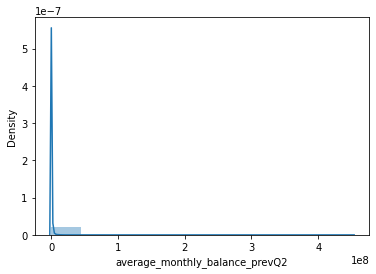

In [ ]:
sns.distplot(df['average_monthly_balance_prevQ2'], bins=10)

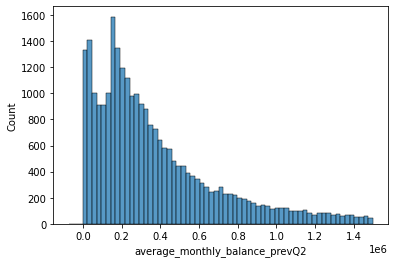

In [ ]:
sns.histplot(df['average_monthly_balance_prevQ2'], binrange=(-75000,1500000))

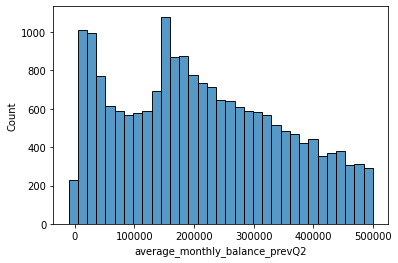

In [ ]:
sns.histplot(df['average_monthly_balance_prevQ2'], binrange=(-10000,500000))

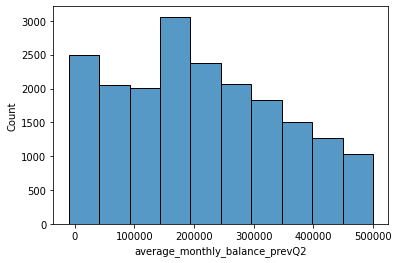

In [ ]:
sns.histplot(df['average_monthly_balance_prevQ2'], bins=10, binrange=(-10000,500000))

## Current Month Credit

In [ ]:
print("Min:", df['current_month_credit'].min())
print("25%:", df['current_month_credit'].quantile(.25))
print("50%:", df['current_month_credit'].quantile(.5))
print("75%:", df['current_month_credit'].quantile(.75))
print("Max:", df['current_month_credit'].max())
print("Mean:", df['current_month_credit'].mean())
print("Median:", df['current_month_credit'].median())
print("Mode:", df['current_month_credit'].mode())
print("Standard deviation:", df['current_month_credit'].std())

Min: 1
25%: 24.0
50%: 59.0
75%: 51570.0
Max: 1226984539
Mean: 310965.749383412
Median: 59.0
Mode: 0    3
dtype: int64
Standard deviation: 7682398.828427185


In [ ]:
print("lowerbound:",df['current_month_credit'].quantile(.25)-(1.5*df['current_month_credit'].quantile(.25)))
print("upperbound:",df['current_month_credit'].quantile(.75)+(1.5*df['current_month_credit'].quantile(.75)))

lowerbound: -12.0
upperbound: 128925.0


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


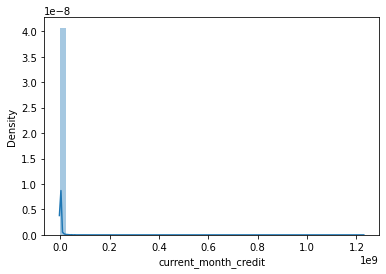

In [ ]:
sns.distplot(df['current_month_credit'])

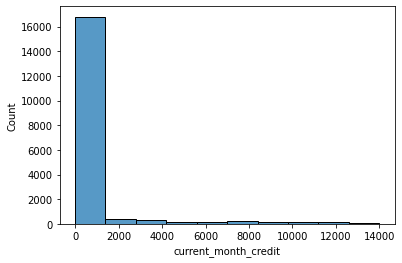

In [ ]:
sns.histplot(df['current_month_credit'], bins=10, binrange=(-12,14000))

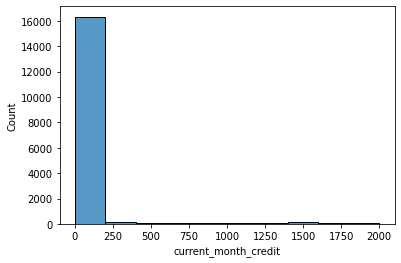

In [ ]:
sns.histplot(df['current_month_credit'], bins=10, binrange=(1,2000))

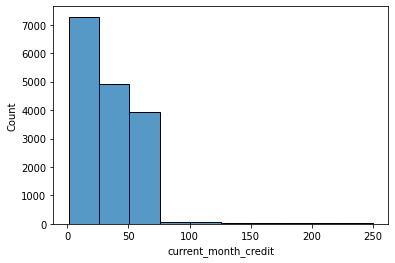

In [ ]:
sns.histplot(df['current_month_credit'], bins=10, binrange=(1,250))

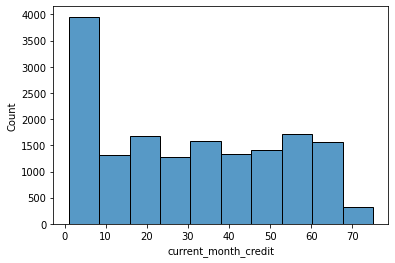

In [ ]:
sns.histplot(df['current_month_credit'], bins=10, binrange=(1,75))

## Previous Month Credit

In [ ]:
print("Min:", df['previous_month_credit'].min())
print("25%:", df['previous_month_credit'].quantile(.25))
print("50%:", df['previous_month_credit'].quantile(.5))
print("75%:", df['previous_month_credit'].quantile(.75))
print("Max:", df['previous_month_credit'].max())
print("Mean:", df['previous_month_credit'].mean())
print("Median:", df['previous_month_credit'].median())
print("Mode:", df['previous_month_credit'].mode())
print("Standard deviation:", df['previous_month_credit'].std())

Min: 1
25%: 24.0
50%: 61.0
75%: 62072.25
Max: 236180829
Mean: 296944.94246353325
Median: 61.0
Mode: 0    1
dtype: int64
Standard deviation: 2928505.8791780774


In [ ]:
print("lowerbound:",df['previous_month_credit'].quantile(.25)-(1.5*df['previous_month_credit'].quantile(.25)))
print("upperbound:",df['previous_month_credit'].quantile(.75)+(1.5*df['previous_month_credit'].quantile(.75)))

lowerbound: -12.0
upperbound: 155180.625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


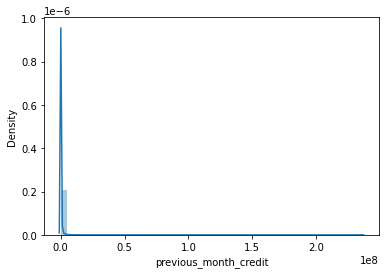

In [ ]:
sns.distplot(df['previous_month_credit'])

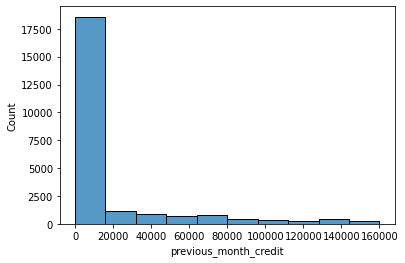

In [ ]:
sns.histplot(df['previous_month_credit'], bins=10, binrange=(-15,160000))

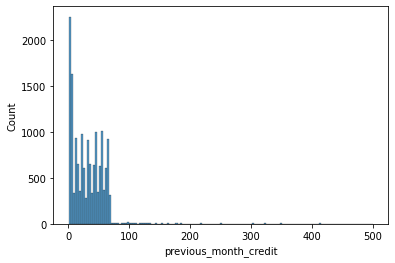

In [ ]:
sns.histplot(df['previous_month_credit'], binrange=(1,500))

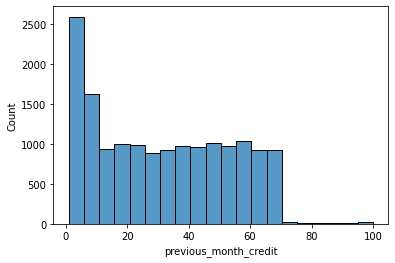

In [ ]:
sns.histplot(df['previous_month_credit'], bins=20, binrange=(1,100))

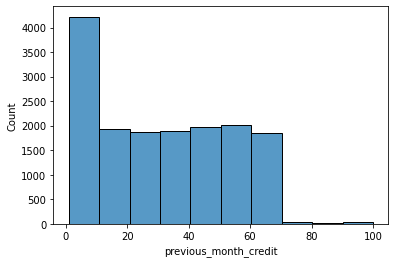

In [ ]:
sns.histplot(df['previous_month_credit'], bins=10, binrange=(1,100))

## Current Month Debit

In [ ]:
print("Min:", df['current_month_debit'].min())
print("25%:", df['current_month_debit'].quantile(.25))
print("50%:", df['current_month_debit'].quantile(.5))
print("75%:", df['current_month_debit'].quantile(.75))
print("Max:", df['current_month_debit'].max())
print("Mean:", df['current_month_debit'].mean())
print("Median:", df['current_month_debit'].median())
print("Mode:", df['current_month_debit'].mode())
print("Standard deviation:", df['current_month_debit'].std())

Min: 1
25%: 36.0
50%: 5288.5
75%: 105115.0
Max: 763785736
Mean: 328485.44207596366
Median: 5288.5
Mode: 0    1
dtype: int64
Standard deviation: 5126750.671786057


In [ ]:
print("lowerbound:",df['current_month_debit'].quantile(.25)-(1.5*df['current_month_debit'].quantile(.25)))
print("upperbound:",df['current_month_debit'].quantile(.75)+(1.5*df['current_month_debit'].quantile(.75)))

lowerbound: -18.0
upperbound: 262787.5


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


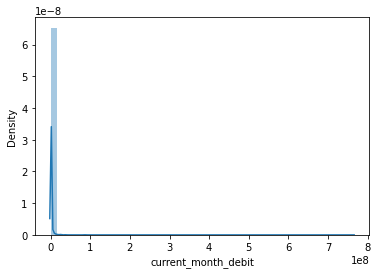

In [ ]:
sns.distplot(df['current_month_debit'])

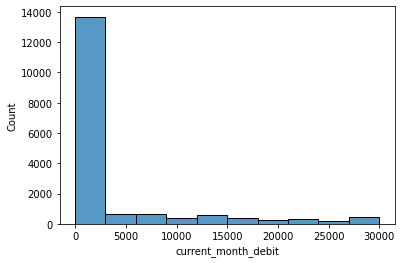

In [ ]:
sns.histplot(df['current_month_debit'], bins=10, binrange=(-20,30000))

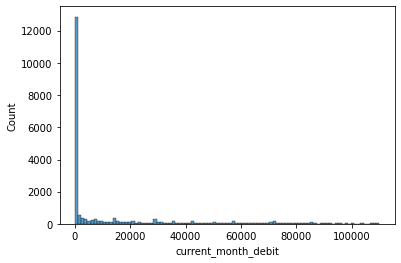

In [ ]:
sns.histplot(df['current_month_debit'], binrange=(1,110000))

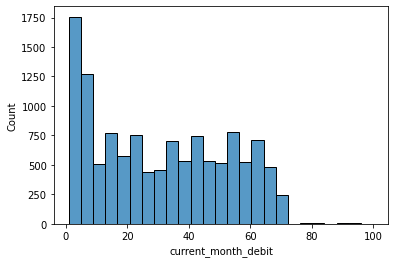

In [ ]:
sns.histplot(df['current_month_debit'], bins=25,binrange=(1,100))

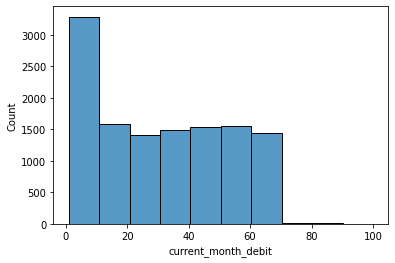

In [ ]:
sns.histplot(df['current_month_debit'], bins=10,binrange=(1,100))

## Previous Month Debit

In [ ]:
print("Min:", df['previous_month_debit'].min())
print("25%:", df['previous_month_debit'].quantile(.25))
print("50%:", df['previous_month_debit'].quantile(.5))
print("75%:", df['previous_month_debit'].quantile(.75))
print("Max:", df['previous_month_debit'].max())
print("Mean:", df['previous_month_debit'].mean())
print("Median:", df['previous_month_debit'].median())
print("Mode:", df['previous_month_debit'].mode())
print("Standard deviation:", df['previous_month_debit'].std())

Min: 1
25%: 36.0
50%: 6262.5
75%: 105196.25
Max: 141416806
Mean: 295026.3651610176
Median: 6262.5
Mode: 0    1
dtype: int64
Standard deviation: 2233221.9565929314


In [ ]:
print("lowerbound:",df['previous_month_debit'].quantile(.25)-(1.5*df['previous_month_debit'].quantile(.25)))
print("upperbound:",df['previous_month_debit'].quantile(.75)+(1.5*df['previous_month_debit'].quantile(.75)))

lowerbound: -18.0
upperbound: 262990.625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


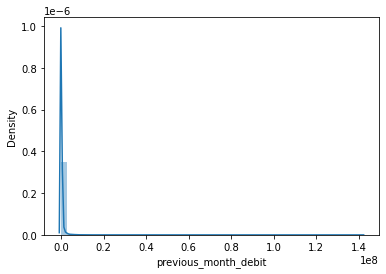

In [ ]:
sns.distplot(df['previous_month_debit'])

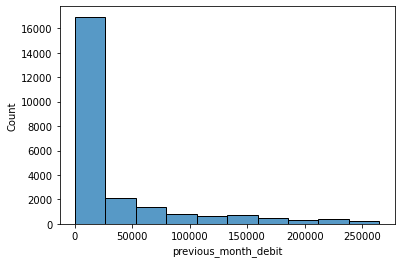

In [ ]:
sns.histplot(df['previous_month_debit'], bins=10, binrange=(-20, 265000))

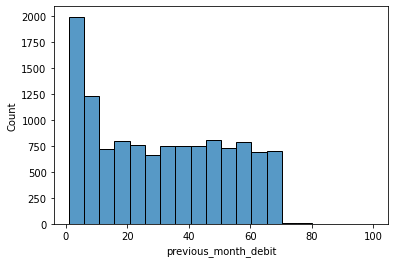

In [ ]:
sns.histplot(df['previous_month_debit'], bins=20, binrange=(1, 100))

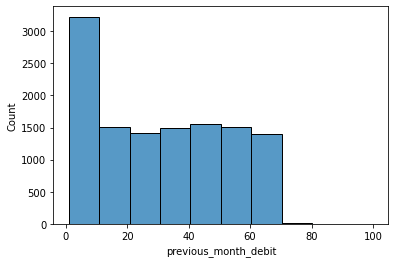

In [ ]:
sns.histplot(df['previous_month_debit'], bins=10, binrange=(1, 100))

## Current Month Balance

In [ ]:
print("Min:", df['current_month_balance'].min())
print("25%:", df['current_month_balance'].quantile(.25))
print("50%:", df['current_month_balance'].quantile(.5))
print("75%:", df['current_month_balance'].quantile(.75))
print("Max:", df['current_month_balance'].max())
print("Mean:", df['current_month_balance'].mean())
print("Median:", df['current_month_balance'].median())
print("Mode:", df['current_month_balance'].mode())
print("Standard deviation:", df['current_month_balance'].std())

Min: -337418
25%: 167526.75
50%: 307511.5
75%: 614694.5
Max: 577818477
Mean: 675884.0763159749
Median: 307511.5
Mode: 0    142914
dtype: int64
Standard deviation: 4081232.4123685593


In [ ]:
print("lowerbound:",df['current_month_balance'].quantile(.25)-(1.5*df['current_month_balance'].quantile(.25)))
print("upperbound:",df['current_month_balance'].quantile(.75)+(1.5*df['current_month_balance'].quantile(.75)))

lowerbound: -83763.375
upperbound: 1536736.25


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


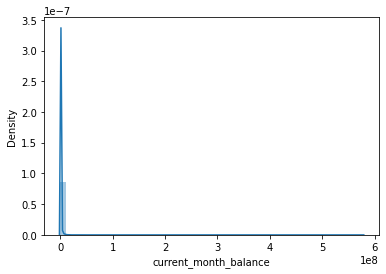

In [ ]:
sns.distplot(df['current_month_balance'])

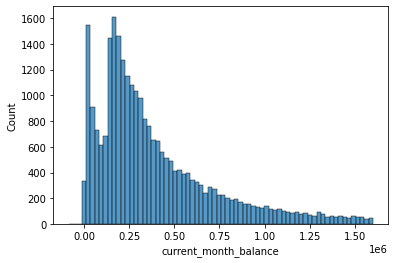

In [ ]:
sns.histplot(df['current_month_balance'], binrange=(-85000,1600000))

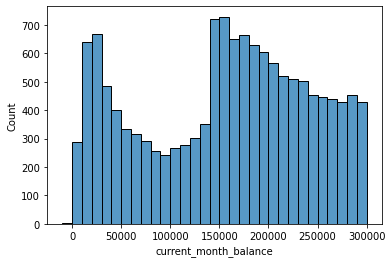

In [ ]:
sns.histplot(df['current_month_balance'], bins=31, binrange=(-10000,300000))

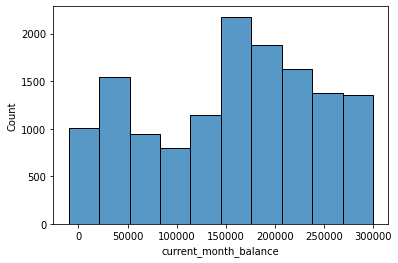

In [ ]:
sns.histplot(df['current_month_balance'], bins=10, binrange=(-10000,300000))

## Previous Month Balance

In [ ]:
print("Min:", df['previous_month_balance'].min())
print("25%:", df['previous_month_balance'].quantile(.25))
print("50%:", df['previous_month_balance'].quantile(.5))
print("75%:", df['previous_month_balance'].quantile(.75))
print("Max:", df['previous_month_balance'].max())
print("Mean:", df['previous_month_balance'].mean())
print("Median:", df['previous_month_balance'].median())
print("Mode:", df['previous_month_balance'].mode())
print("Standard deviation:", df['previous_month_balance'].std())

Min: -517192
25%: 176131.0
50%: 309603.0
75%: 612810.25
Max: 157283293
Mean: 663884.1024240716
Median: 309603.0
Mode: 0     29565
1    142883
2    142914
3    146507
4    155659
5    317747
6    463531
dtype: int64
Standard deviation: 2393405.4442617637


In [ ]:
print("lowerbound:",df['previous_month_balance'].quantile(.25)-(1.5*df['previous_month_balance'].quantile(.25)))
print("upperbound:",df['previous_month_balance'].quantile(.75)+(1.5*df['previous_month_balance'].quantile(.75)))

lowerbound: -88065.5
upperbound: 1532025.625


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


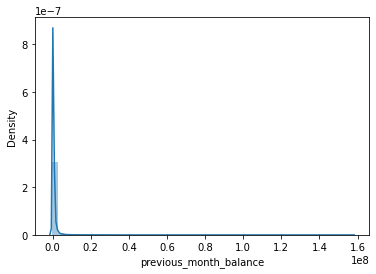

In [ ]:
sns.distplot(df['previous_month_balance'])

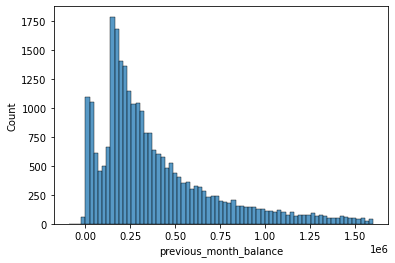

In [ ]:
sns.histplot(df['previous_month_balance'], binrange=(-90000,1600000))

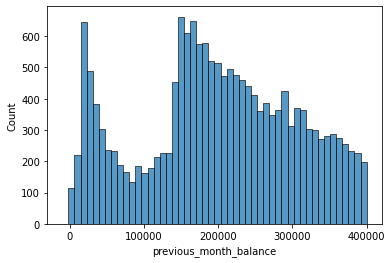

In [ ]:
sns.histplot(df['previous_month_balance'], bins=50, binrange=(-10000,400000))

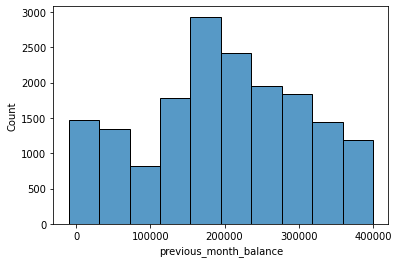

In [ ]:
sns.histplot(df['previous_month_balance'], bins=10, binrange=(-10000,400000))

## Churn

In [ ]:
df['churn'].value_counts()

0    23122
1     5260
Name: churn, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


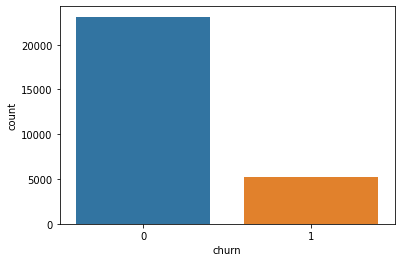

In [ ]:
sns.countplot(df['churn'])

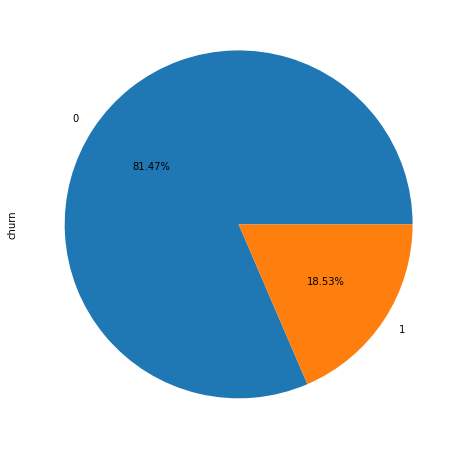

In [ ]:
df['churn'].value_counts().plot.pie(autopct="%1.2f%%", figsize=(10,8))
sns.set(font_scale=0.5)

# Analisis Bivariat

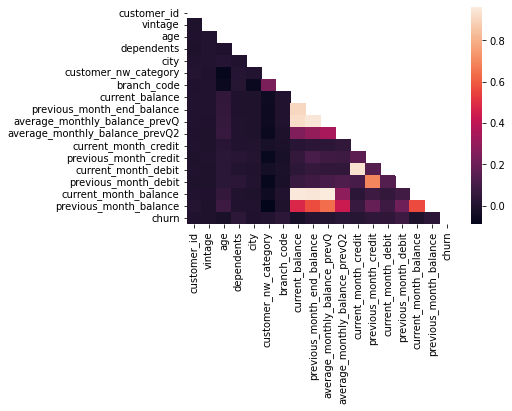

In [ ]:
# creating mask
mask = np.triu(np.ones_like(df.corr()))
 
# plotting a triangle correlation heatmap
dataplot = sns.heatmap(df.corr(), mask=mask)
 
# displaying heatmap
plt.show()

## Vintage & Churn

Dari hasil analisis histogram pada nilai dari atribut Vintage, maka diasumsikan customer lama adalah yang **Vintage >= 2000 days** , maka proporsi customer lama dalam tiap kategori Churn & Non-churn adalah sbb.

Customer yang Non-churn & merupakan customer lama = 71.03%

Customer yang Churn & merupakan customer lama = 69.9%

***Customer lama cenderung Non-Churn***

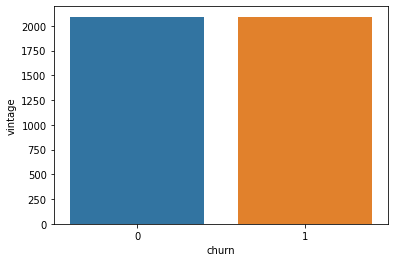

In [ ]:
sns.barplot(x='churn',y='vintage',data=df,ci=None)

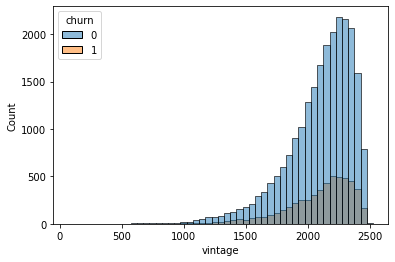

In [ ]:
sns.histplot(x='vintage', data=df, binwidth=50, hue=df['churn'])

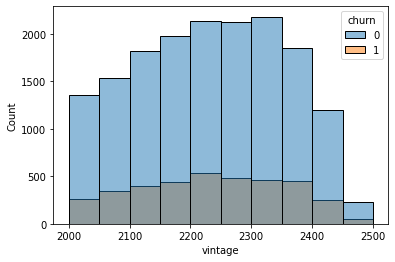

In [ ]:
sns.reset_orig()
sns.histplot(x='vintage', data=df[df['vintage']>=2000], binwidth=50, hue=df['churn'])

In [ ]:
df_nonchurn[df_nonchurn['vintage']>=2000]['vintage'].count() # = 16423 orang Non-Churn dengan lama Vintage >= 2000 days
16423/ df_nonchurn['vintage'].count() # 88.9% orang yg Non-Churn dengan lama Vintage >= 2000 days

0.7102759276879163

Text(0.5, 1.0, 'Vintage>=2000 days in Non-Churn customer')

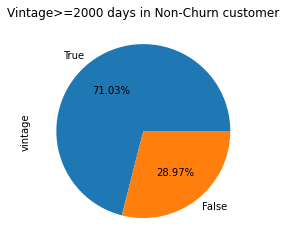

In [ ]:
(df_nonchurn['vintage']>=2000).value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Vintage>=2000 days in Non-Churn customer")

In [ ]:
df_churn[df_churn['vintage']>=2000]['vintage'].count() # = 3677 orang Churn dengan lama Vintage >= 2000 days
3677 / df_churn['vintage'].count() # 88.5% orang yg Churn dengan lama Vintage >= 2000 days

0.6990494296577947

Text(0.5, 1.0, 'Vintage>=2000 days in Churn customer')

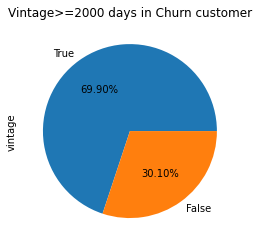

In [ ]:
(df_churn['vintage']>=2000).value_counts().plot.pie(autopct="%1.2f%%")
plt.title("Vintage>=2000 days in Churn customer")

## Age & Churn

Diasumsikan **Usia produktif** adalah customer yang **Age between 20 - 60 tahun** , maka proporsi Orang Usia Produktif dalam tiap kategori Churn & Non-churn adalah sbb.

Customer yang Non-churn & merupakan kategori Usia Produktif = 70.98%

Customer yang Churn & merupakan kategori Usia Produktif = 75.3%

***Customer yang berada di Usia Produktif cenderung untuk Churn***

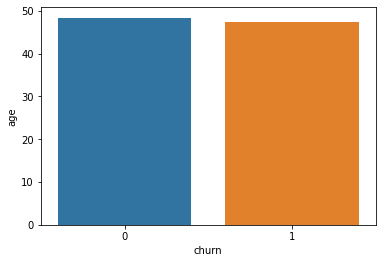

In [ ]:
sns.barplot(x='churn', y='age', ci=None, data=df)
# sedikit lebih rendah rata-rata usia pada customer yang churn

0.7097569414410518


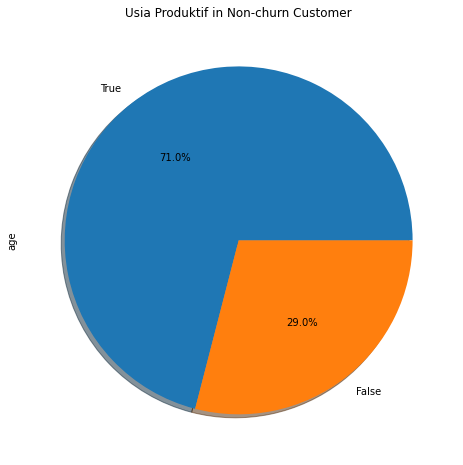

In [ ]:
df_nonchurn[df_nonchurn['age'].between(20,60)].count() # = 16411 orang Non-Churn dengan Usia Produktif (20 - 60 tahun)
print(16411 / df_nonchurn['age'].count()) # 70.98% orang yg Non-Churn dengan Usia Produktif (20 - 60 tahun)

df_nonchurn['age'].between(20,60).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Usia Produktif in Non-churn Customer')
plt.show()

0.753041825095057


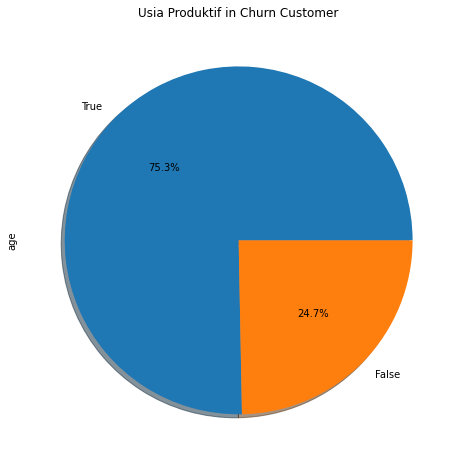

In [ ]:
df_churn[df_churn['age'].between(20,60)].count() # = 3961 orang Churn dengan Usia Produktif (20 - 60 tahun)
print(3961 / df_churn['age'].count()) # 75.3% orang yg Churn dengan Usia Produktif (20 - 60 tahun)

df_churn['age'].between(20,60).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Usia Produktif in Churn Customer')
plt.show()

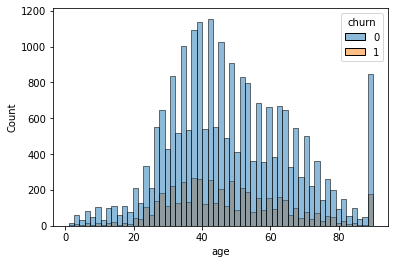

In [ ]:
sns.histplot(x='age', data=df, hue=df['churn'])

## Gender & Churn

-------------------------------------------------------

Customer yang Non-Churn & Laki-laki = 58.9%

Customer yang Churn & Laki-laki = **61.5%** 

***Customer laki-laki cenderung Churn***

---------------------------------------------------------

Customer yang Non-Churn & Perempuan = **41.1%**

Customer yang Churn & Perempuan = 38.5%

***Customer perempuan cenderung Non-Churn***


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


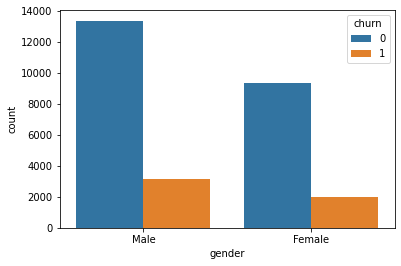

In [ ]:
sns.countplot(df['gender'], hue=df['churn'])

Non-Churn & Male: 13379
Non-Churn & Female: 9324


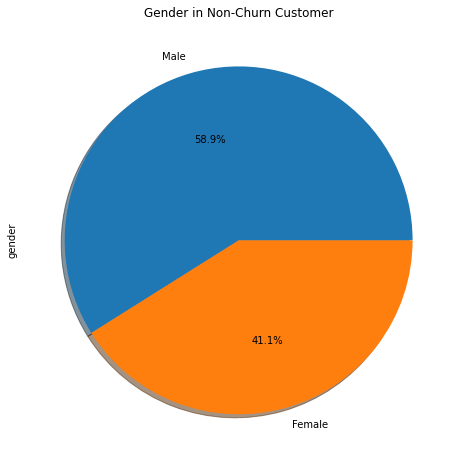

In [ ]:
print("Non-Churn & Male:", len(df_nonchurn[df_nonchurn['gender']=='Male']))
print("Non-Churn & Female:", len(df_nonchurn[df_nonchurn['gender']=='Female']))

df_nonchurn['gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Gender in Non-Churn Customer')
plt.show()

Churn & Male: 3169
Churn & Female: 1985


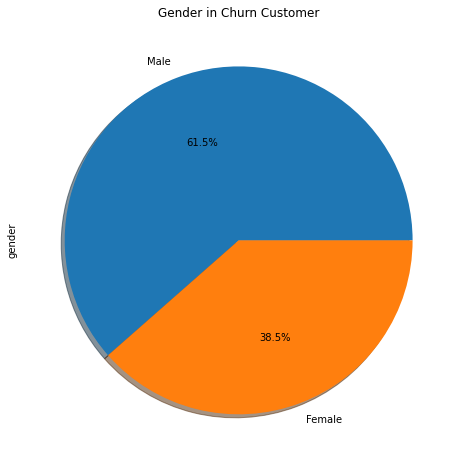

In [ ]:
print("Churn & Male:", len(df_churn[df_churn['gender']=='Male']))
print("Churn & Female:", len(df_churn[df_churn['gender']=='Female']))

df_churn['gender'].value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.title('Gender in Churn Customer')
plt.show()

## Dependents & Churn

Customer Non-Churn & Dependents < 4 = 76.6%

Customer Churn & Dependents < 4 = 71%

Customer dengan **Dependents < 4** cenderung untuk **Non-churn** 

Customer **yang memiliki Dependents < 4** cenderung untuk **Non-Churn**

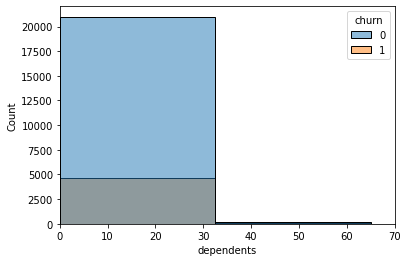

In [ ]:
fig, ax = plt.subplots()
sns.histplot(x='dependents', data=df, hue=df['churn'])
ax.set_xlim(0,70)
plt.show()

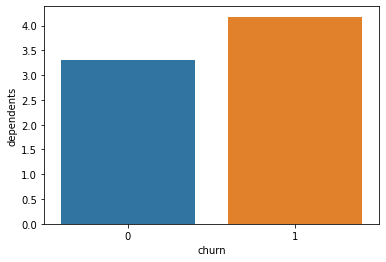

In [ ]:
sns.barplot(x='churn',y='dependents',data=df, ci=None)

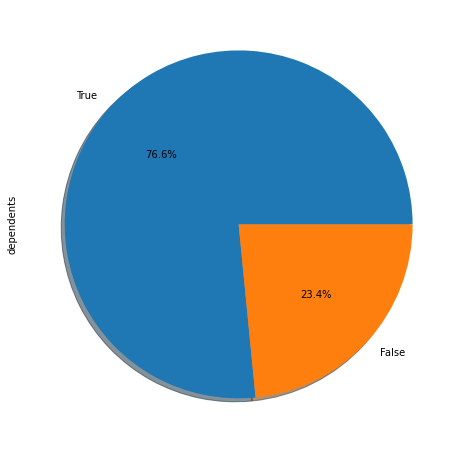

In [ ]:
(df_nonchurn['dependents']<4).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

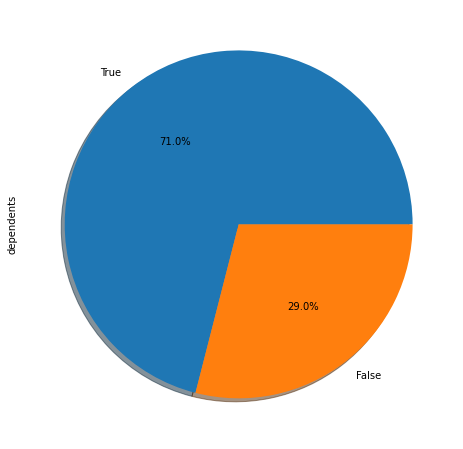

In [ ]:
(df_churn['dependents']<4).value_counts().plot.pie(autopct='%1.1f%%',shadow=True,figsize=(10,8))
plt.show()

## Occupation & Churn

***Customer yang Self-employed cenderung untuk Churn***

***Customer yang Salaried, Student, Retired, Company cenderung untuk Non-Churn***

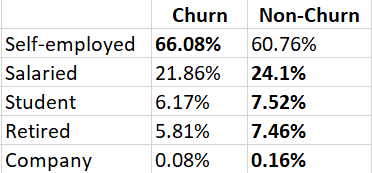

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


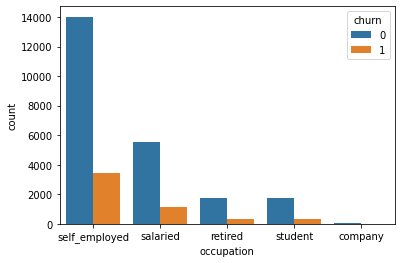

In [ ]:
sns.countplot(df['occupation'],hue=df['churn'])

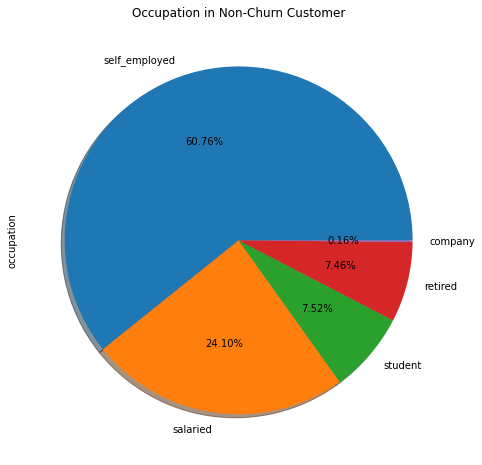

In [ ]:
df_nonchurn['occupation'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8))
plt.title("Occupation in Non-Churn Customer")
plt.show()

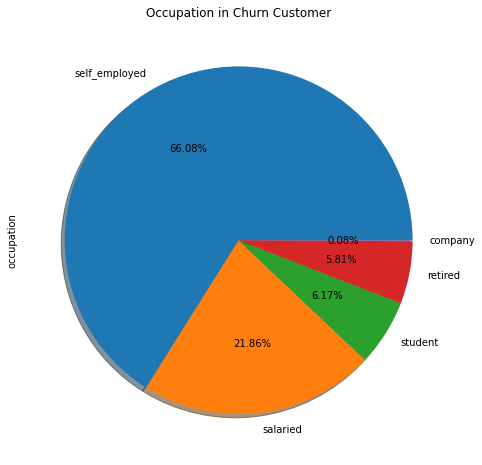

In [ ]:
df_churn['occupation'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8))
plt.title("Occupation in Churn Customer")
plt.show()

## Customer Net Worth Category & Churn

Customer dengan Net Worth Category **High (1) & Low (3)** cenderung untuk **Churn**

Customer dengan Net Worth Category **Medium (2)** cenderung untuk **Non-Churn**

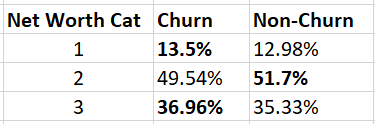

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


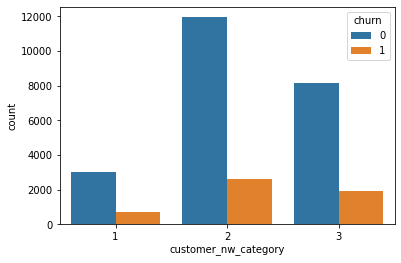

In [ ]:
sns.countplot(df['customer_nw_category'], hue=df['churn'])

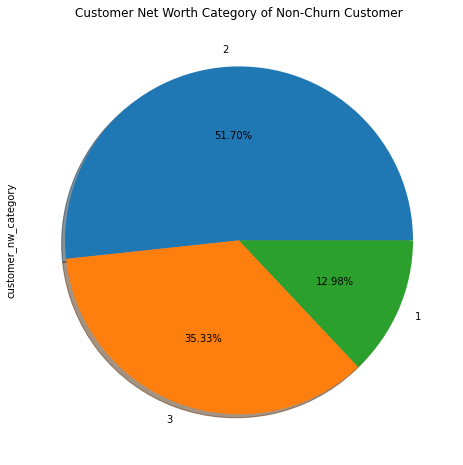

In [ ]:
df_nonchurn['customer_nw_category'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8))
plt.title("Customer Net Worth Category of Non-Churn Customer")
plt.show()

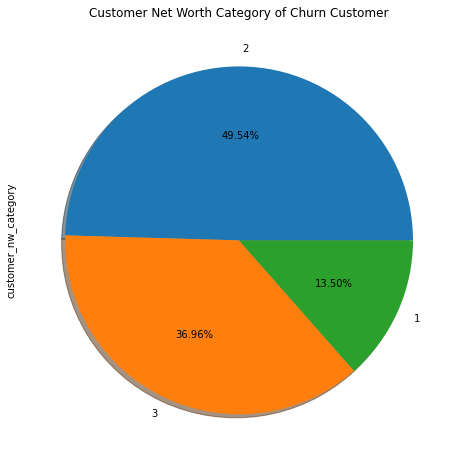

In [ ]:
df_churn['customer_nw_category'].value_counts().plot.pie(autopct='%1.2f%%',shadow=True,figsize=(10,8))
plt.title("Customer Net Worth Category of Churn Customer")
plt.show()

## Overall Balances & Churn

**Rata-rata customer yang Churn, sebelumnya mereka mempunyai rata-rata saldo yang lebih tinggi** daripada customer yang Non-Churn

In [ ]:
len(df[df['current_balance']>=df['current_balance'].quantile(.75)])

7096

Text(0.5, 1.0, '"Average Monthly Balance Previous to Previous Quarter" of Churn vs Non-Churn Customer')

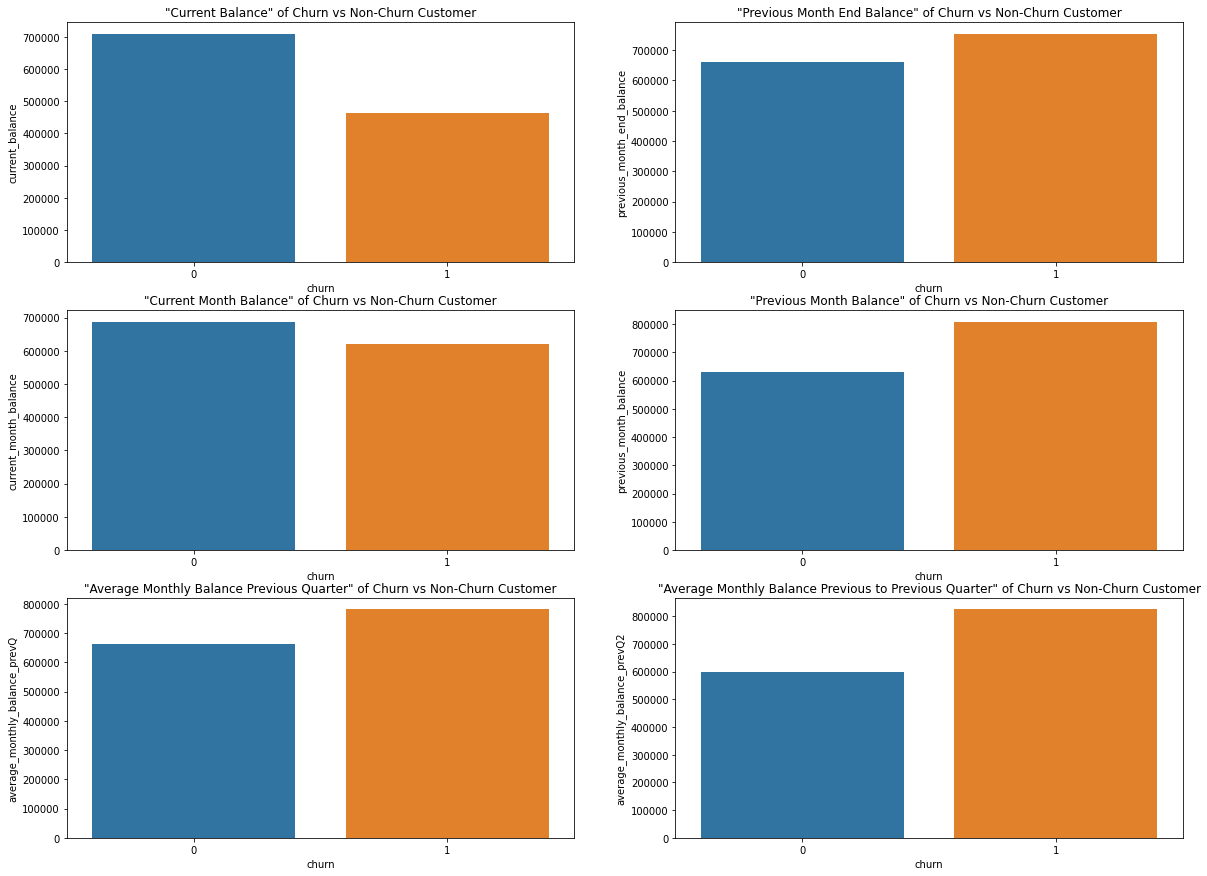

In [ ]:
fig, ax = plt.subplots(3,2, figsize=(20,15))

#Current Balance of Churn vs Non-Churn Customer
sns.barplot(ax=ax[0,0],x="churn", y='current_balance', data=df, ci=None)
ax[0,0].set_title("\"Current Balance\" of Churn vs Non-Churn Customer")

#Previous Month End Balance of Churn vs Non-Churn Customer
sns.barplot(ax=ax[0,1],x="churn", y='previous_month_end_balance', data=df, ci=None)
ax[0,1].set_title("\"Previous Month End Balance\" of Churn vs Non-Churn Customer")

#Current Month Balance of Churn vs Non-Churn Customer
sns.barplot(ax=ax[1,0],x="churn", y='current_month_balance', data=df, ci=None)
ax[1,0].set_title("\"Current Month Balance\" of Churn vs Non-Churn Customer")

#Previous Month Balance of Churn vs Non-Churn Customer
sns.barplot(ax=ax[1,1],x="churn", y='previous_month_balance', data=df, ci=None)
ax[1,1].set_title("\"Previous Month Balance\" of Churn vs Non-Churn Customer")

#Average Monthly Balance Previous Quarter of Churn vs Non-Churn Customer
sns.barplot(ax=ax[2,0],x="churn", y='average_monthly_balance_prevQ', data=df, ci=None)
ax[2,0].set_title("\"Average Monthly Balance Previous Quarter\" of Churn vs Non-Churn Customer")

#Average Monthly Balance Previous to Previous Quarter of Churn vs Non-Churn Customer
sns.barplot(ax=ax[2,1],x="churn", y='average_monthly_balance_prevQ2', data=df, ci=None)
ax[2,1].set_title("\"Average Monthly Balance Previous to Previous Quarter\" of Churn vs Non-Churn Customer")

In [ ]:
df['avg_all_balance'] = (df['current_balance']+df['previous_month_end_balance']+df['average_monthly_balance_prevQ']+
                         df['average_monthly_balance_prevQ2']+df['current_month_balance']+df['previous_month_balance'])/6

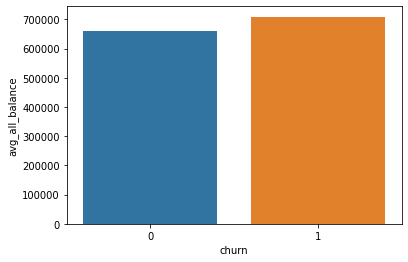

In [ ]:
sns.barplot(x="churn", y="avg_all_balance", data=df, ci=None)

### Penurunan saldo bulanan & Churn

**Customer yang mengalami penurunan saldo** cenderung untuk **Churn**

Selisih Average Month Balance

In [ ]:
diff_monthbalance = df['current_month_balance']-df['previous_month_balance']
(diff_monthbalance<0).value_counts()

False    15520
True     12862
dtype: int64

Text(0.5, 1.0, 'Selisih Rataan Saldo Bulan Ini dengan Bulan Lalu')

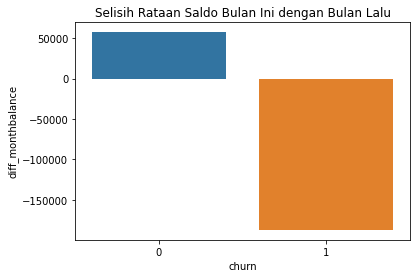

In [ ]:
df['diff_monthbalance'] = df['current_month_balance']-df['previous_month_balance']
sns.barplot(x='churn', y='diff_monthbalance', data=df, ci=None)
plt.title("Selisih Rataan Saldo Bulan Ini dengan Bulan Lalu")

Selisih Saldo Saat ini dengan Saldo Akhir Bulan Lalu

In [ ]:
diff_balance=df['current_balance']-df['previous_month_end_balance']
(diff_balance<0).value_counts()

False    16533
True     11849
dtype: int64

Text(0.5, 1.0, 'Selisih Saldo Terkini dengan Saldo Akhir Bulan Lalu')

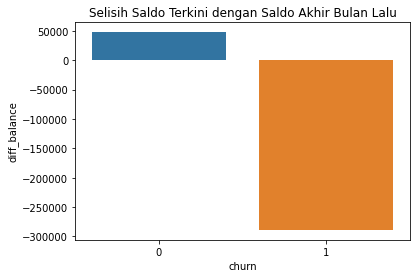

In [ ]:
df['diff_balance']=df['current_balance']-df['previous_month_end_balance']
sns.barplot(x='churn', y='diff_balance', data=df, ci=None)
plt.title("Selisih Saldo Terkini dengan Saldo Akhir Bulan Lalu")

## Credit, Debit, & Churn

Customer dengan **Total Credit & Debit yang Sedikit** justru cenderung untuk **Non-Churn**

Sebaliknya, customer dengan **Total Credit & Debit yang Tinggi** justru cenderung untuk **Churn**. Dimana, mereka **Total Debit (menarik uang) >> Total Credit (menambah uang)**. Maka, customer yang Churn cenderung memiliki **saldo yang fluktuatif**, yakni mereka melakukan Credit dalam jumlah besar sehingga rata-rata Saldonya lebih tinggi daripada Non-Churn, namun jumlah Debit atau uang yang ditarik justru lebih besar lagi sehingga penurunan saldonya sangat drastis

Selisih Total Credit Bulan Ini dengan Bulan Lalu

In [ ]:
credit_diff=df['current_month_credit']-df['previous_month_credit']
(credit_diff<0).value_counts()

False    20390
True      7992
dtype: int64

Text(0.5, 1.0, 'Selisih Total Credit Bulan Ini dengan Bulan Lalu')

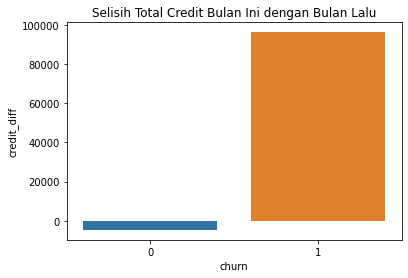

In [231]:
df['credit_diff']=df['current_month_credit']-df['previous_month_credit']
sns.barplot(x='churn', y='credit_diff', data=df, ci=None)
plt.title("Selisih Total Credit Bulan Ini dengan Bulan Lalu")

Selisih Total Debit Bulan Ini dengan Bulan Lalu

In [ ]:
debit_diff=df['current_month_debit']-df['previous_month_debit']
(debit_diff<0).value_counts()

False    18660
True      9722
dtype: int64

Text(0.5, 1.0, 'Selisih Total Debit Bulan Ini dengan Bulan Lalu')

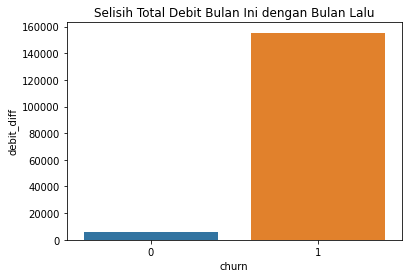

In [232]:
df['debit_diff']=df['current_month_debit']-df['previous_month_debit']
sns.barplot(x='churn', y='debit_diff', data=df, ci=None)
plt.title("Selisih Total Debit Bulan Ini dengan Bulan Lalu")

## Days Since Last Transaction & Churn

Customer yang **transaksi > 6 bulan lalu, lebih cenderung untuk Non-Churn**

In [ ]:
df['transact_morethan_6mo'] = df['days_since_last_transaction']>=180

In [ ]:
df.loc[df['transact_morethan_6mo']==True, 'transact_morethan_6mo'] = "more than 6 months"

In [ ]:
df_nonchurn['transact_morethan_6mo'] = df_nonchurn['days_since_last_transaction']>=180
df_nonchurn.loc[df_nonchurn['transact_morethan_6mo']==True, 'transact_morethan_6mo'] = "more than 6 months"

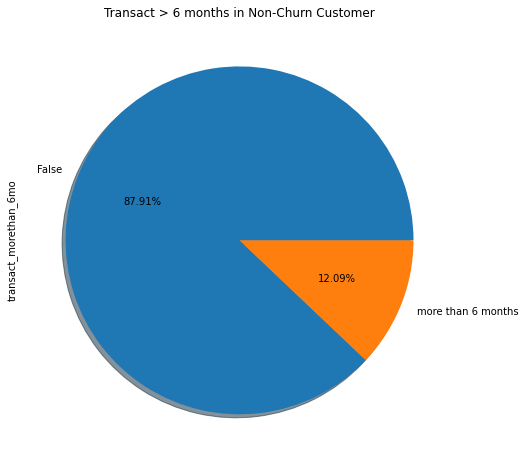

In [ ]:
df_nonchurn['transact_morethan_6mo'].value_counts().plot.pie(autopct="%1.2f%%",shadow=True,figsize=(10,8))
plt.title("Transact > 6 months in Non-Churn Customer")
plt.show()

In [ ]:
df_churn['transact_morethan_6mo'] = df_churn['days_since_last_transaction']>=180
df_churn.loc[df_churn['transact_morethan_6mo']==True, 'transact_morethan_6mo'] = "more than 6 months"

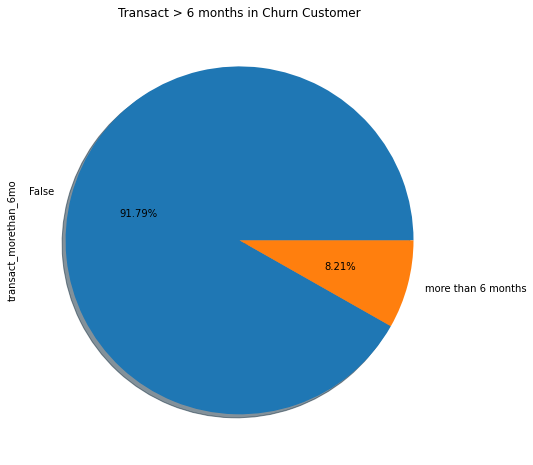

In [ ]:
df_churn['transact_morethan_6mo'].value_counts().plot.pie(autopct="%1.2f%%",shadow=True,figsize=(10,8))
plt.title("Transact > 6 months in Churn Customer")
plt.show()

## Branch, City, & Churn

Diasumsikan Kota dengan sedikit nasabah adalah yang memiliki nasabah < 500 orang

Diasumsikan Cabang dengan sedikit nasabah adalah yang memiliki nasabah < 50 orang

Customer yang terdaftar pada **Kota dengan sedikit nasabah**, cenderung untuk **Churn**

Customer yang terdaftar pada **Cabang dengan sedikit nasabah**, cenderung untuk **Churn**

In [238]:
threshold = 50
counts = df['branch_code'].value_counts()
df_branch_lessfreq = df.loc[df['branch_code'].isin(counts[counts < threshold].index), :]

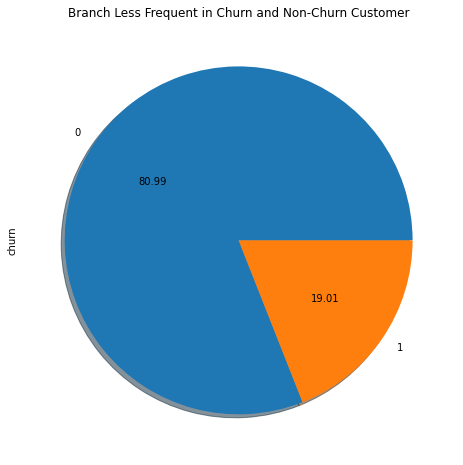

In [246]:
df_branch_lessfreq['churn'].value_counts().plot.pie(autopct="%1.2f",shadow=True,figsize=(10,8))
plt.title("Branch Less Frequent in Churn and Non-Churn Customer")
plt.show()

In [239]:
threshold = 50
counts = df['branch_code'].value_counts()
df_branch_morefreq = df.loc[df['branch_code'].isin(counts[counts >= threshold].index), :]

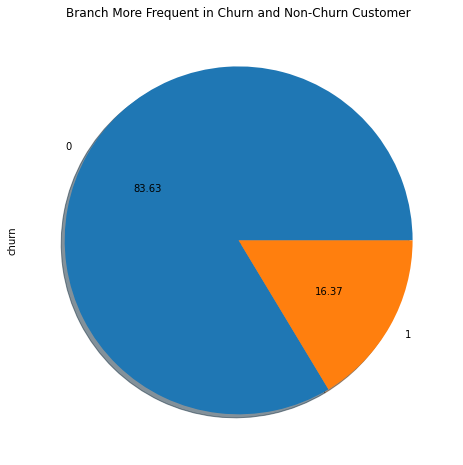

In [245]:
df_branch_morefreq['churn'].value_counts().plot.pie(autopct="%1.2f",shadow=True,figsize=(10,8))
plt.title("Branch More Frequent in Churn and Non-Churn Customer")
plt.show()

In [236]:
threshold = 500
counts = df['city'].value_counts()
df_city_lessfreq = df.loc[df['city'].isin(counts[counts < threshold].index), :]

In [241]:
threshold = 500
counts = df['city'].value_counts()
df_city_morefreq = df.loc[df['city'].isin(counts[counts >= threshold].index), :]

Text(0.5, 1.0, 'City Less Frequent in Churn and Non-Churn Customer')

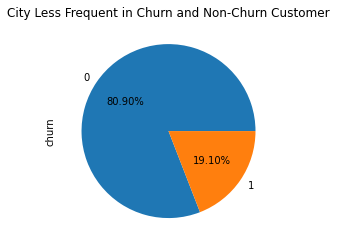

In [247]:
df_city_lessfreq['churn'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("City Less Frequent in Churn and Non-Churn Customer")

Text(0.5, 1.0, 'City More Frequent in Churn and Non-Churn Customer')

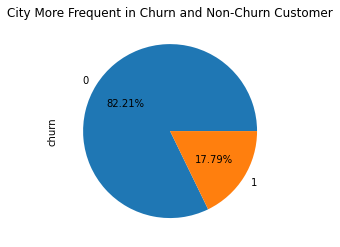

In [248]:
df_city_morefreq['churn'].value_counts().plot.pie(autopct="%1.2f%%")
plt.title("City More Frequent in Churn and Non-Churn Customer")

In [ ]:
# df_citybranch_lessfreq = df.loc[df['city'].isin(df_city_lessfreq['city'].index) & df['branch_code'].isin(df_branch_lessfreq['branch_code'].index)]

In [ ]:
# df_citybranch_lessfreq['churn'].value_counts().plot.pie(autopct="%1.2f",shadow=True, figsize=(10,8))
# plt.show()

In [ ]:
# df_citybranch_morefreq = df.loc[df['city'].isin(df_city_morefreq['city'].index) & df['branch_code'].isin(df_branch_morefreq['branch_code'].index)]

In [ ]:
# df_citybranch_morefreq['churn'].value_counts().plot.pie(autopct="%1.2f",shadow=True, figsize=(10,8))
# plt.show()

# Data Preprocessing

## Check Duplicate Rows

In [ ]:
df.duplicated().sum()

0

## Check Data Type

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   customer_id                     28382 non-null  int64  
 1   vintage                         28382 non-null  int64  
 2   age                             28382 non-null  int64  
 3   gender                          27857 non-null  object 
 4   dependents                      25919 non-null  float64
 5   occupation                      28302 non-null  object 
 6   city                            27579 non-null  float64
 7   customer_nw_category            28382 non-null  int64  
 8   branch_code                     28382 non-null  int64  
 9   days_since_last_transaction     25159 non-null  float64
 10  current_balance                 28382 non-null  int64  
 11  previous_month_end_balance      28382 non-null  int64  
 12  average_monthly_balance_prevQ   

In [249]:
df_preprocess = df.copy()

In [250]:
df_preprocess['dependents'] = df_preprocess['dependents'].notnull().astype(int)
df_preprocess['city'] = df_preprocess['city'].notnull().astype(int)
df_preprocess['days_since_last_transaction'] = df_preprocess['days_since_last_transaction'].notnull().astype(int)

In [ ]:
df_preprocess.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28382 entries, 0 to 28381
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype 
---  ------                          --------------  ----- 
 0   customer_id                     28382 non-null  int64 
 1   vintage                         28382 non-null  int64 
 2   age                             28382 non-null  int64 
 3   gender                          27857 non-null  object
 4   dependents                      28382 non-null  int64 
 5   occupation                      28302 non-null  object
 6   city                            28382 non-null  int64 
 7   customer_nw_category            28382 non-null  int64 
 8   branch_code                     28382 non-null  int64 
 9   days_since_last_transaction     28382 non-null  int64 
 10  current_balance                 28382 non-null  int64 
 11  previous_month_end_balance      28382 non-null  int64 
 12  average_monthly_balance_prevQ   28382 non-null

## Handling Missing Values

In [ ]:
df.isna().sum()

customer_id                          0
vintage                              0
age                                  0
gender                             525
dependents                        2463
occupation                          80
city                               803
customer_nw_category                 0
branch_code                          0
days_since_last_transaction       3223
current_balance                      0
previous_month_end_balance           0
average_monthly_balance_prevQ        0
average_monthly_balance_prevQ2       0
current_month_credit                 0
previous_month_credit                0
current_month_debit                  0
previous_month_debit                 0
current_month_balance                0
previous_month_balance               0
churn                                0
diff_balance                         0
credit_diff                          0
debit_diff                           0
transact_morethan_6mo                0
dtype: int64

In [251]:
## Untuk Categorical columns dg missing values: Gender, Occupation, City 
## Opsi 1: replace with Mode
## Opsi 2: drop rows with missing value

for column in ['gender', 'occupation', 'city']:
    df_preprocess[column].fillna(df_preprocess[column].mode()[0], inplace=True) #replacing with mode

In [252]:
## Untuk Numerical columns dg missing values: Dependents, Days since last transaction
## Opsi 1: replace with Median (considering there are outliers)
## Opsi 2: drop rows with missing value

for column in ['dependents', 'days_since_last_transaction']:
    df_preprocess[column].fillna(df_preprocess[column].median(), inplace=True) #replacing w/ median

In [253]:
df_preprocess.isna().sum()

customer_id                       0
vintage                           0
age                               0
gender                            0
dependents                        0
occupation                        0
city                              0
customer_nw_category              0
branch_code                       0
days_since_last_transaction       0
current_balance                   0
previous_month_end_balance        0
average_monthly_balance_prevQ     0
average_monthly_balance_prevQ2    0
current_month_credit              0
previous_month_credit             0
current_month_debit               0
previous_month_debit              0
current_month_balance             0
previous_month_balance            0
churn                             0
diff_monthbalance                 0
diff_balance                      0
credit_diff                       0
debit_diff                        0
dtype: int64

## Handling Outlier

In [ ]:
## Opsi 1: replace with Median
## Opsi 2: drop rows with outlier

# function for defining lower & upper bound
def outlier_treatment(datacolumn):
  sorted(datacolumn)
  Q1,Q3 = np.percentile(datacolumn , [25,75])
  IQR = Q3 - Q1
  lower_range = Q1 - (1.5 * IQR)
  upper_range = Q3 + (1.5 * IQR)
  return lower_range,upper_range

In [ ]:
# counting rows with outlier

for column in ['vintage','age','dependents','days_since_last_transaction',
               'current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2',
               'current_month_credit','previous_month_credit','current_month_balance','previous_month_balance']:
               lowerbound, upperbound = outlier_treatment(df_preprocess[column])
               print(column, df_preprocess[(df_preprocess[column] < lowerbound) | (df_preprocess[column] > upperbound)][column].count())

vintage 945
age 0
dependents 4484
days_since_last_transaction 2976
current_balance 2724
previous_month_end_balance 2706
average_monthly_balance_prevQ 2724
average_monthly_balance_prevQ2 2601
current_month_credit 4865
previous_month_credit 4560
current_month_balance 2671
previous_month_balance 2728


In [ ]:
# considering count of rows with outlier is > 100, therefore it's better to replace it with Median

# for loops to replace outlier with median
for column in ['vintage','dependents','days_since_last_transaction',
               'current_balance','previous_month_end_balance','average_monthly_balance_prevQ','average_monthly_balance_prevQ2',
               'current_month_credit','previous_month_credit','current_month_balance','previous_month_balance']:
               lowerbound, upperbound = outlier_treatment(df_preprocess[column])
               median = df_preprocess[column].median()
               df_preprocess[column] = np.where((df_preprocess[column] < lowerbound) | (df_preprocess[column] > upperbound), median, df_preprocess[column])

In [ ]:
# checking data distribution after removing outlier

def beforeafteroutlier(colname):
  fig, ax = plt.subplots(1,2,figsize=(15, 5))

  sns.histplot(ax=ax[0], x=colname, data=df)
  ax[0].set_title('(before removing outlier)')

  sns.histplot(ax=ax[1], x=colname, data=df_preprocess)
  ax[1].set_title("(after removing outlier)")

Ternyata, ditemukan bahwa hasil preprocess outlier pada column 'Dependents' justru mengubah seluruh nilai menjadi 0

Oleh karena itu, nilai column 'Dependents' dikembalikan menjadi seperti semula & hanya dilakukan penanganan missing values

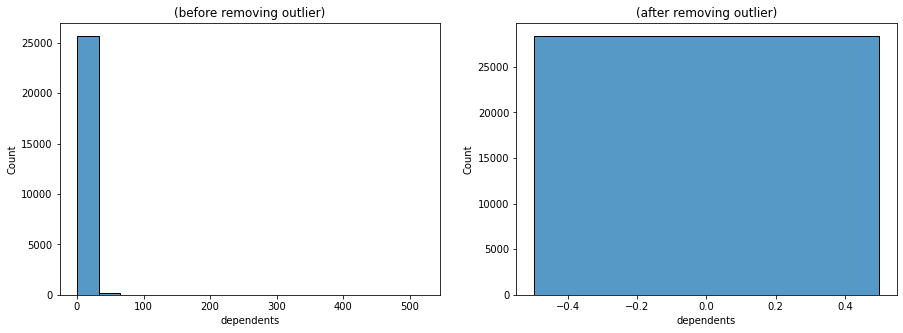

In [ ]:
beforeafteroutlier('dependents')

In [ ]:
df_preprocess.dependents.value_counts()

0.0    28382
Name: dependents, dtype: int64

In [ ]:
df_preprocess.dependents = df.dependents.fillna(df.dependents.median())

In [ ]:
df_preprocess.dependents.value_counts()

0.0      23898
20.0      2150
10.0      1395
30.0       701
40.0       179
50.0        41
60.0         8
70.0         3
90.0         1
520.0        1
360.0        1
500.0        1
80.0         1
250.0        1
320.0        1
Name: dependents, dtype: int64